In [80]:
#pip install tweepy


In [81]:
#pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
import tweepy
#import xlsxwriter
%matplotlib inline


warnings.filterwarnings('ignore')


info about training testing data #review later

In [2]:
df = pd.read_csv('tweets31962.csv')
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


Remove hyperlinks, Twitter marks and styles
We do not want to use every word in a tweet because many tweets have hashtags, retweet marks, and hyperlinks. We will use regular expressions to remove them from a tweet.


In [4]:

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [5]:
def remove_hyperlinks_marks_styles(tweet):
    
    # remove old style retweet text "RT"
    new_tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    new_tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', new_tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    new_tweet = re.sub(r'#', '', new_tweet)
    
    return new_tweet

Tokenize the string
To tokenize means to split a string into individual words.

In [6]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

def tokenize_tweet(tweet):
    
    tweet_tokens = tokenizer.tokenize(tweet)
    
    return tweet_tokens

Remove stop works and punctuations Remove stop words and punctuations. Stop words are words that don't add significant meaning to the text. For example, 'i' and 'me'.

In [7]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

punctuations = string.punctuation

def remove_stopwords_punctuations(tweet_tokens):
    
    tweets_clean = []
    
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in punctuations):
            tweets_clean.append(word)
            
    return tweets_clean

Stemming The process of converting a word to its most general form, or stem.

learning -> learn

learned -> learn

learnt -> learn

In [8]:
stemmer = PorterStemmer()

def get_stem(tweets_clean):
    
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

implementation of preprocessing funcions on a example tweet

In [9]:
tweet_example = df['tweet'][45]
print(tweet_example)

processed_tweet = remove_hyperlinks_marks_styles(tweet_example)
print("\nRemoved hyperlinks, Twitter marks and styles:")
print(processed_tweet)

tweet_tokens = tokenize_tweet(processed_tweet)
print("\nTokenize the string:")
print(tweet_tokens)

tweets_clean = remove_stopwords_punctuations(tweet_tokens)
print("\nRemove stop words and punctuations:")
print(tweets_clean)

tweets_stem = get_stem(tweets_clean)
print("\nGet stem of each word:")
print(tweets_stem)

i am amazing. #i_am #positive #affirmation     

Removed hyperlinks, Twitter marks and styles:
i am amazing. i_am positive affirmation     

Tokenize the string:
['i', 'am', 'amazing', '.', 'i_am', 'positive', 'affirmation']

Remove stop words and punctuations:
['amazing', 'i_am', 'positive', 'affirmation']

Get stem of each word:
['amaz', 'i_am', 'posit', 'affirm']


Combine all preprocess techniques

In [10]:
def process_tweet(tweet):
    
    processed_tweet = remove_hyperlinks_marks_styles(tweet)
    tweet_tokens = tokenize_tweet(processed_tweet)
    tweets_clean = remove_stopwords_punctuations(tweet_tokens)
    tweets_stem = get_stem(tweets_clean)
    
    return tweets_stem

In [11]:
tweet_example = df['tweet'][277]
print(tweet_example)

processed_tweet = process_tweet(tweet_example)
print(processed_tweet)

the #conjuring2 get ready to be scared! tonight it's on! #readyornot #truestory   
['conjur', '2', 'get', 'readi', 'scare', 'tonight', 'readyornot', 'truestori']


Creating columns for cleantweets 

In [12]:
n=df.shape[0]

df['clean_tweet_wordlist']=df['tweet']

for i in range(n):
    df['clean_tweet_wordlist'][i]=process_tweet(df['tweet'][i])
    
#takes few minutes to process


In [13]:
# combine words into single sentence
df['clean_tweet_sentence']=df['clean_tweet_wordlist']
for i in range(n):
    df.clean_tweet_sentence[i] = " ".join(df.clean_tweet_sentence[i])
    

In [14]:
df.head(5)

,label,tweet,clean_tweet_wordlist,clean_tweet_sentence
0,0,@user when a father is dysfunctional and is s...,"[father, dysfunct, selfish, drag, kid, dysfunc...",father dysfunct selfish drag kid dysfunct run
1,0,@user @user thanks for #lyft credit i can't us...,"[thank, lyft, credit, can't, use, caus, offer,...",thank lyft credit can't use caus offer wheelch...
2,0,bihday your majesty,"[bihday, majesti]",bihday majesti
3,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, urð, , , ±, ...",model love u take u time urð   ± ð    ð ...
4,0,factsguide: society now #motivation,"[factsguid, societi, motiv]",factsguid societi motiv


In [18]:
print(type(df.clean_tweet_sentence[0]))
print(type(df.clean_tweet_wordlist[0]))

<class 'str'>
<class 'list'>


In [ ]:
"""# writing to Excel
datatoexcel = pd.ExcelWriter('cleantweetsfinal.xlsx')
  
# write DataFrame to excel
df.to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')"""

In [97]:
#df.to_csv('tweets31962processed.csv', index=False,header=True)

In [235]:
#df1=pd.read_csv('tweets31962processed.csv')

Exploratory Data Analysis

<class 'str'>


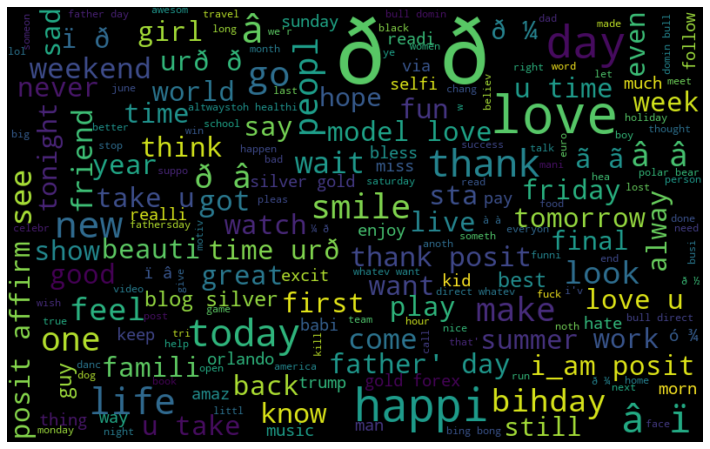

In [15]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet_sentence']])
print(type(all_words))

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

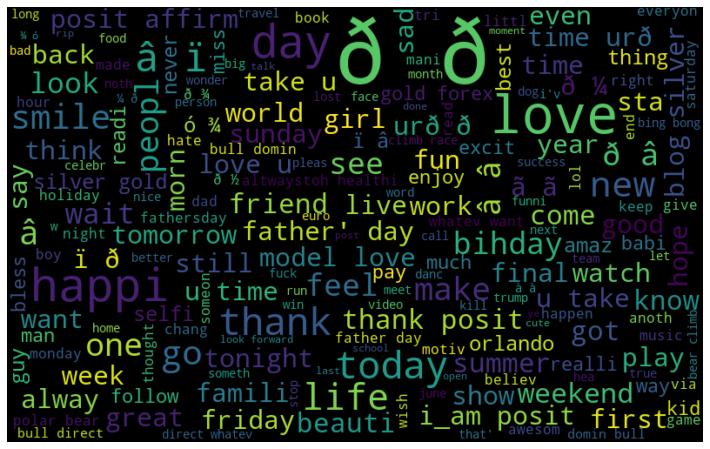

In [16]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet_sentence'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

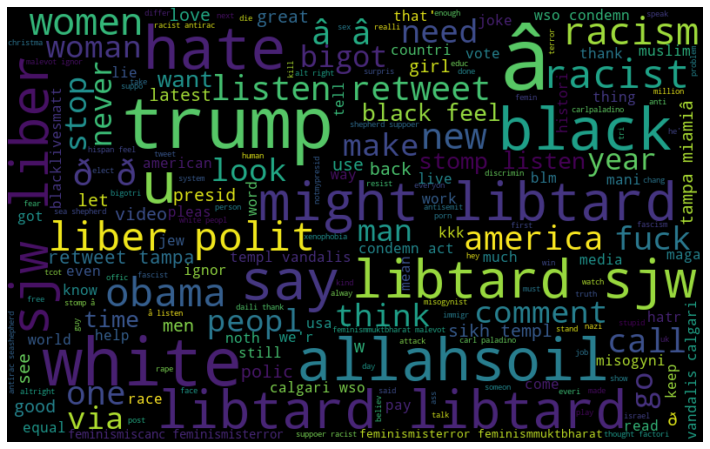

In [17]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet_sentence'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Feature extraction

In [19]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
vec =  CountVectorizer(max_df=0.90, min_df=2, max_features=4000, stop_words='english')
vec.fit(df['clean_tweet_sentence'])


CountVectorizer(max_df=0.9, max_features=4000, min_df=2, stop_words='english')

In [20]:
print(*vec.get_feature_names()[200:400])

alleg alli allig allow allâ almighti aloha alon alreadi alt altern altright altwaystoh alumni alway amarind amateur amaz amazon ambassador amen amend america american amodu amsterdam amwrit ana anal analyt andrea andrew android andâ anf angel anger angri anim ann anna anniversari announc annoy annual anoth answer anthem anti antirac antisemit anton antonyelchin anxieti anxiou anybodi anymor anyon anyth anywher anz apa apaheid apament ape apolog app appar appeal appear appl appletstag appli applic appoint appreci approv april arab archangel archiv area arenâ argentina argu argument arkansa arm armi arrest arriv arsen ascot ash asham ashiq asian ask ass assault assess asshol assist assum astrolog ate atherapi athlet atlanta atm atmospher attack attempt attend attent attitud attract au aud audienc audit august augusta auspol austin australia australian author avail aveng averag avoid aw await awak awar award away awesom awhil awork aww awww aâ b4 babe babi babygirl background backward bac

Model Training

Split data into two pieces, one for training and one for testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
trn, val = train_test_split(df, test_size=0.2, random_state=42)

trn_tweet= vec.transform(trn['clean_tweet_sentence'])
val_tweet = vec.transform(val['clean_tweet_sentence'])
trn_sentiment=trn['label']
val_sentiment=val['label']

In [23]:
print(trn_tweet.shape[0])
print(val_tweet.shape[0])

25569
6393


Importing naive bayes model from sklearn library

In [24]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix


In [25]:
classifierM = MultinomialNB()
classifierB = BernoulliNB()

In [26]:

classifierM.fit(trn_tweet, trn_sentiment)
classifierB.fit(trn_tweet, trn_sentiment)



BernoulliNB()

Training and Testing using Multinomial model

In [27]:
predtestM = classifierM.predict(val_tweet)
print(accuracy_score(val_sentiment, predtestM))
print(confusion_matrix(val_sentiment, predtestM))

0.9458783043954325
[[5727  210]
 [ 136  320]]


In [28]:
print(metrics.classification_report(val_sentiment, predtestM))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5937
           1       0.60      0.70      0.65       456

    accuracy                           0.95      6393
   macro avg       0.79      0.83      0.81      6393
weighted avg       0.95      0.95      0.95      6393



Training and Testing using Bernoulli model

In [29]:
predtestB = classifierB.predict(val_tweet)
print(accuracy_score(val_sentiment, predtestB))
print(confusion_matrix(val_sentiment, predtestB))

0.9486938839355545
[[5762  175]
 [ 153  303]]


In [30]:
print(metrics.classification_report(val_sentiment, predtestB))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5937
           1       0.63      0.66      0.65       456

    accuracy                           0.95      6393
   macro avg       0.80      0.82      0.81      6393
weighted avg       0.95      0.95      0.95      6393



Training and Testing using Logistic Regression model

In [34]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(trn_tweet, trn_sentiment)
predtestL= log.predict(val_tweet)
print(accuracy_score(val_sentiment, predtestL))
print(confusion_matrix(val_sentiment, predtestL))
print(metrics.classification_report(val_sentiment, predtestL))


0.9587048334115439
[[5890   47]
 [ 217  239]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.84      0.52      0.64       456

    accuracy                           0.96      6393
   macro avg       0.90      0.76      0.81      6393
weighted avg       0.96      0.96      0.95      6393



Scrapping data from twitter on real time basis 

In [35]:

#Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token='your_bearer_token')



In [36]:
tweet1=tweepy.Paginator(client.search_recent_tweets, query='modi -is : retweet lang:en',tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000)

tweet2=tweepy.Paginator(client.search_recent_tweets, query='joe biden -is : retweet lang:en',tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000)

#tweet3=api_connect.search_tweets('Xi Zingping',lang = 'en', count = 150,  tweet_mode = 'extended')
tweet3=tweepy.Paginator(client.search_recent_tweets, query='putin -is : retweet lang:en',tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000)


tweet4=tweepy.Paginator(client.search_recent_tweets, query='justin trudeau -is : retweet lang:en',tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000)


In [37]:
def tweetlist(tweets):
    tweetli=[]
    for tweet in tweets:
        cleantweetlist=process_tweet(tweet.text)
        cleantweetsentence = " ".join(cleantweetlist)
        tweetli.append(cleantweetsentence) #for paginator
    return tweetli

In [38]:
tweet1list=tweetlist(tweet1)
tweet2list=tweetlist(tweet2)
tweet3list=tweetlist(tweet3)
tweet4list=tweetlist(tweet4)


In [39]:
tweetapi=pd.DataFrame({'Modi':tweet1list,'Biden':tweet2list,'Putin':tweet3list,'Trudeau':tweet4list})

In [40]:
print(tweetapi.shape)
tweetapi.head(3)

(1000, 4)


,Modi,Biden,Putin,Trudeau
0,amrityear 2022 indian badminton team' meet gre...,impeach joe crimin hunter biden evid,jump say inflat intern lot aw lot putin ’ “ sp...,justin trudeau' hous
1,inspir motto ‘ sabka saath sabka vika sabka vi...,liber airhead someth els thing accus conserv d...,putin kickstart de-industrialis europ ’ factor...,dont sound good use stand shaki justin trudeau...
2,demonet undoubtedli biggest disastr decis modi...,last night third dream joe biden period year t...,’ kind stupid ’ countri stronger putin fuck tr...,know justin trudeau call peopl oppos idioci ra...


In [137]:
# tweetapi.to_csv("twitterapidata_7oct.csv")

In [41]:
def detailoftweets(tweetlist):
    print("Example tweet : " )
    print(tweetlist[111])
    
    print("number of tweets: "  ,  len(tweetlist) )
    tweetvec=vec.transform([tweetlist[15]])
    pol=classifierB.predict(tweetvec)
    
    print("sentiment is : ")
    print(*pol)
    print()
    

In [42]:
detailoftweets(tweet1list)
detailoftweets(tweet2list)
detailoftweets(tweet3list)
detailoftweets(tweet4list)


Example tweet : 
pm shri narendra modi inaugur 108th session indian scienc congress 3rd januari 2023 via video conferenc watch live 📺 📺 📺
number of tweets:  1000
sentiment is : 
0

Example tweet : 
joe biden good economi great 401k 40 good crook po wife jill home wrecker
number of tweets:  1000
sentiment is : 
0

Example tweet : 
putin jr restrict right
number of tweets:  1000
sentiment is : 
0

Example tweet : 
think would help understand lib support justin trudeau could watch 1 hoc question period explain would vote use inform provid said question period trudeaumustgo
number of tweets:  1000
sentiment is : 
0



In [ ]:
#testing for use
"""pos=0
neg=0

# testing
"""
"""predtest = classifier3.predict(tweettest)
print(predtest)"""
"""

for tweet in tweet:
    tweetvec=vec.transform([tweet])
    pol=classifierB.predict(tweetvec)
    
    print("tweet is :")
    print(tweet)
    print("sentiment is : ")
    print(*pol)
    print()
    if pol==0:
        pos+=1
    else:
        neg+=1
    
    
    
#ploting graphs
plt.xlabel("tags")
plt.ylabel("polarity")
plt.bar(['pos','neg'],[pos,neg])
plt.show()"""

In [43]:
leaders=["Modi" , "Biden" , "Putin" , "Trudeau"]

pos=[]

tweetvec=vec.transform(tweet1list)
pol=classifierM.predict(tweetvec)

a=np.count_nonzero(pol== 0)
b=np.count_nonzero(pol== 1)
c=(a/(a+b))*100
pos.append(c)

tweetvec=vec.transform(tweet2list)
pol=classifierM.predict(tweetvec)

a=np.count_nonzero(pol== 0)
b=np.count_nonzero(pol== 1)
c=(a/(a+b))*100
pos.append(c)

tweetvec=vec.transform(tweet3list)
pol=classifierM.predict(tweetvec)

a=np.count_nonzero(pol== 0)
b=np.count_nonzero(pol== 1)
c=(a/(a+b))*100
pos.append(c)

tweetvec=vec.transform(tweet4list)
pol=classifierM.predict(tweetvec)

a=np.count_nonzero(pol== 0)
b=np.count_nonzero(pol== 1)
c=(a/(a+b))*100
pos.append(c)

pos

[69.6, 44.2, 18.6, 68.30000000000001]

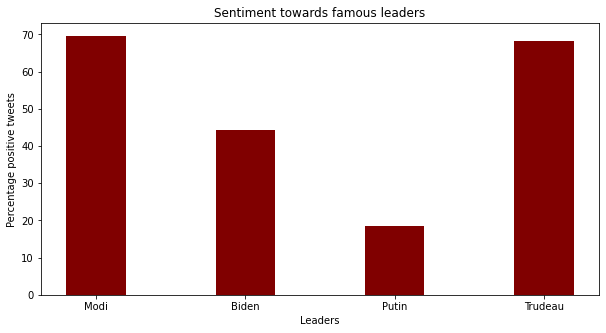

In [44]:

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(leaders, pos, color ='maroon',
        width = 0.4)
 
plt.xlabel("Leaders")
plt.ylabel("Percentage positive tweets")
plt.title("Sentiment towards famous leaders")
plt.show()